In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_d = pd.read_excel(os.path.join('Dayton_All.xlsx'))
del df_d['Year']
del df_d['Month']
del df_d['Day']
del df_d['Day_of_Week']
del df_d['Weekend']
del df_d['Datetime']

df_d.head()

MW Utility  Temp(f)
0  1793  DAYTON    30.99
1  1788  DAYTON    33.80
2  1730  DAYTON    32.00
3  1701  DAYTON    30.20
4  1693  DAYTON    32.00

In [3]:
df_2016pos = df_d[df_d['Temp(f)'] >= 60].copy()
df_2016neg = df_d[df_d['Temp(f)'] < 60].copy()

In [4]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (11031, 1) (11031, 1)


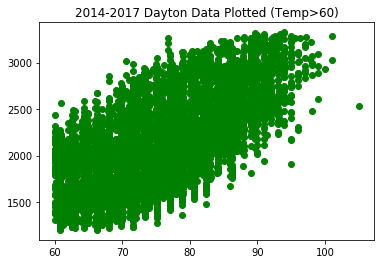

In [5]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Dayton Data Plotted (Temp>60)")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.42318887081901096
Testing Score: 0.4405928004728791


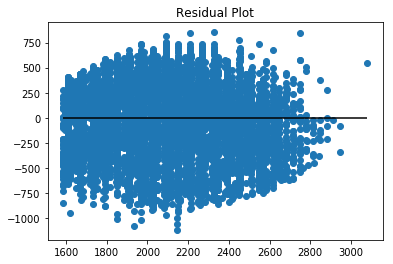

In [10]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

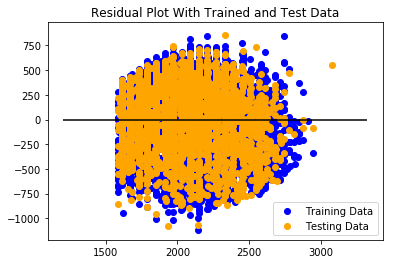

In [11]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [12]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[33.24873408]]
y-axis intercept:  [-410.87605475]


In [13]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -410.87605475+ 33.24873408 * x_min
y_max = -410.87605475+ 33.24873408 * x_max

Actual Min Value: 1199
Predicted Min Value: [[1584.38047755]]
Actual Max Value: 3327
Predicted Max Value: [[3080.57351127]]


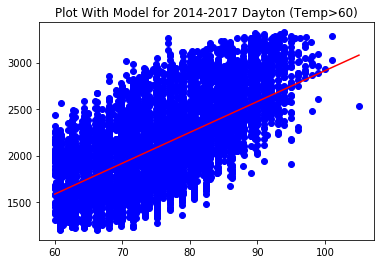

In [15]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Dayton (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [16]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1433]
Predicted output: [1730.34242017]
Prediction Error: [297.34242017]


In [17]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [33]:
for x in range(len(df_2016pos)):
   modeldf.loc[modeldf.Actual == df_2016pos.iloc[x].MW,'Temp'] =df_2016pos.iloc[x]['Temp(f)']

In [36]:
modeldf

Actual       Error    Predicted   Temp
0     1793.0  325.144192  2118.144192  34.00
1     1788.0  287.238533  2075.238533  46.40
2     1730.0  372.722585  2102.722585  50.00
3     1701.0  429.206637  2130.206637  42.80
4     1693.0  409.722585  2102.722585  30.20
5     1708.0  367.238533  2075.238533  41.84
6     1732.0  343.238533  2075.238533  59.00
7     1778.0  297.238533  2075.238533  41.00
8     1849.0  226.238533  2075.238533  41.00
9     1877.0  170.754481  2047.754481  33.80
10    1937.0  110.754481  2047.754481  57.99
11    1949.0   98.754481  2047.754481  53.60
12    1918.0  129.754481  2047.754481  57.20
13    1913.0  107.270429  2020.270429  46.40
14    1913.0   52.302325  1965.302325  46.40
15    1905.0   32.818272  1937.818272  50.00
16    1901.0  -18.149832  1882.850168  30.20
17    1927.0  -16.665780  1910.334220  44.60
18    2015.0 -187.117936  1827.882064  50.00
19    1999.0 -116.149832  1882.850168  50.00
20    1929.0  -46.149832  1882.850168  55.40
21    1854.0   56.334220  1910.334220  42.80
22    1805.0  132.818272  1937.818272  37.40
23    1745.0  192.818272  1937.818272  53.60
24    1801.0  246.754481  2047.754481  53.01
25    1754.0  321.238533  2075.238533  44.60
26    1733.0  314.754481  2047.754481  51.80
27    1727.0  293.270429  2020.270429  57.20
28    1758.0  317.238533  2075.238533  55.40
29    1838.0  237.238533  2075.238533  42.80
...      ...         ...          ...    ...
9149  1489.0  201.461804  1690.461804  59.00
9150  1562.0  128.461804  1690.461804  59.00
9151  1617.0   73.461804  1690.461804  59.00
9152  1660.0   30.461804  1690.461804  59.00
9153  1656.0   61.945856  1717.945856  57.20
9154  1658.0   47.883411  1705.883411  57.99
9155  2151.0 -460.538196  1690.461804  59.00
9156  1591.0   99.461804  1690.461804  59.00
9157  1771.0  -80.538196  1690.461804  59.00
9158  1852.0 -134.054144  1717.945856  57.20
9159  1921.0 -203.054144  1717.945856  57.20
9160  2014.0 -277.578754  1736.421246  55.99
9161  2091.0 -345.570092  1745.429908  55.40
9162  2152.0 -461.538196  1690.461804  59.00
9163  1777.0  -86.538196  1690.461804  59.00
9164  1863.0 -157.116589  1705.883411  57.99
9165  1924.0 -218.116589  1705.883411  57.99
9166  1998.0 -280.054144  1717.945856  57.20
9167  2043.0 -297.570092  1745.429908  55.40
9168  2040.0 -349.538196  1690.461804  59.00
9169  1591.0   99.461804  1690.461804  59.00
9170  1715.0    2.945856  1717.945856  57.20
9171  1829.0 -138.538196  1690.461804  59.00
9172  1926.0 -220.116589  1705.883411  57.99
9173  2028.0 -310.054144  1717.945856  57.20
9174  2110.0 -392.054144  1717.945856  57.20
9175  1393.0  297.461804  1690.461804  59.00
9176  1487.0  203.461804  1690.461804  59.00
9177  1546.0  144.461804  1690.461804  59.00
9178  2073.0 -395.974844  1677.025156  59.88

[9179 rows x 4 columns]

In [18]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (9179, 1) (9179, 1)


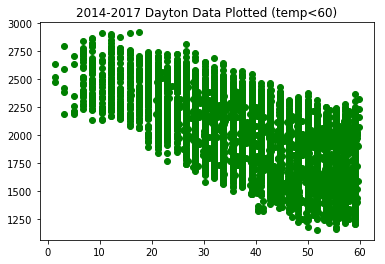

In [20]:
plt.scatter(X, y,color='g')
plt.title("2014-2017 Dayton Data Plotted (temp<60)")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [24]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3629764817256157
Testing Score: 0.3997555210376223


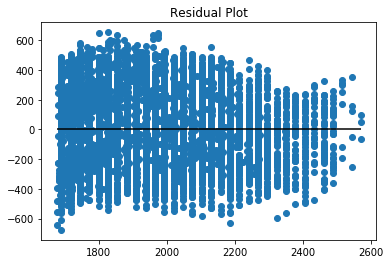

In [25]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

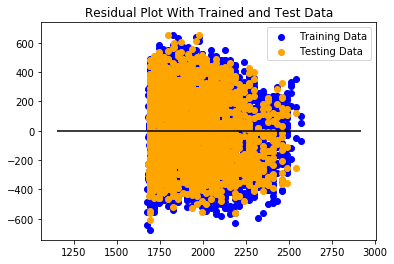

In [26]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [27]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-15.26891783]]
y-axis intercept:  [2591.3279557]


In [28]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  2591.3279557+ (-15.26891783 * x_min)
y_max = 2591.3279557+ (-15.26891783 * x_max)

Actual Min Value: 1151
Predicted Min Value: [[2569.95147073]]
Actual Max Value: 2919
Predicted Max Value: [[1677.02515582]]


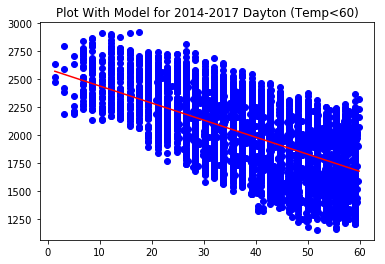

In [30]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2014-2017 Dayton (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [31]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1793]
Predicted output: [2118.14419204]
Prediction Error: [325.14419204]


In [32]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [34]:
for x in range(len(df_2016neg)):
   modeldf.loc[modeldf.Actual == df_2016neg.iloc[x].MW,'Temp'] =df_2016neg.iloc[x]['Temp(f)']

In [35]:
modeldf

Actual       Error    Predicted   Temp
0     1793.0  325.144192  2118.144192  34.00
1     1788.0  287.238533  2075.238533  46.40
2     1730.0  372.722585  2102.722585  50.00
3     1701.0  429.206637  2130.206637  42.80
4     1693.0  409.722585  2102.722585  30.20
5     1708.0  367.238533  2075.238533  41.84
6     1732.0  343.238533  2075.238533  59.00
7     1778.0  297.238533  2075.238533  41.00
8     1849.0  226.238533  2075.238533  41.00
9     1877.0  170.754481  2047.754481  33.80
10    1937.0  110.754481  2047.754481  57.99
11    1949.0   98.754481  2047.754481  53.60
12    1918.0  129.754481  2047.754481  57.20
13    1913.0  107.270429  2020.270429  46.40
14    1913.0   52.302325  1965.302325  46.40
15    1905.0   32.818272  1937.818272  50.00
16    1901.0  -18.149832  1882.850168  30.20
17    1927.0  -16.665780  1910.334220  44.60
18    2015.0 -187.117936  1827.882064  50.00
19    1999.0 -116.149832  1882.850168  50.00
20    1929.0  -46.149832  1882.850168  55.40
21    1854.0   56.334220  1910.334220  42.80
22    1805.0  132.818272  1937.818272  37.40
23    1745.0  192.818272  1937.818272  53.60
24    1801.0  246.754481  2047.754481  53.01
25    1754.0  321.238533  2075.238533  44.60
26    1733.0  314.754481  2047.754481  51.80
27    1727.0  293.270429  2020.270429  57.20
28    1758.0  317.238533  2075.238533  55.40
29    1838.0  237.238533  2075.238533  42.80
...      ...         ...          ...    ...
9149  1489.0  201.461804  1690.461804  59.00
9150  1562.0  128.461804  1690.461804  59.00
9151  1617.0   73.461804  1690.461804  59.00
9152  1660.0   30.461804  1690.461804  59.00
9153  1656.0   61.945856  1717.945856  57.20
9154  1658.0   47.883411  1705.883411  57.99
9155  2151.0 -460.538196  1690.461804  59.00
9156  1591.0   99.461804  1690.461804  59.00
9157  1771.0  -80.538196  1690.461804  59.00
9158  1852.0 -134.054144  1717.945856  57.20
9159  1921.0 -203.054144  1717.945856  57.20
9160  2014.0 -277.578754  1736.421246  55.99
9161  2091.0 -345.570092  1745.429908  55.40
9162  2152.0 -461.538196  1690.461804  59.00
9163  1777.0  -86.538196  1690.461804  59.00
9164  1863.0 -157.116589  1705.883411  57.99
9165  1924.0 -218.116589  1705.883411  57.99
9166  1998.0 -280.054144  1717.945856  57.20
9167  2043.0 -297.570092  1745.429908  55.40
9168  2040.0 -349.538196  1690.461804  59.00
9169  1591.0   99.461804  1690.461804  59.00
9170  1715.0    2.945856  1717.945856  57.20
9171  1829.0 -138.538196  1690.461804  59.00
9172  1926.0 -220.116589  1705.883411  57.99
9173  2028.0 -310.054144  1717.945856  57.20
9174  2110.0 -392.054144  1717.945856  57.20
9175  1393.0  297.461804  1690.461804  59.00
9176  1487.0  203.461804  1690.461804  59.00
9177  1546.0  144.461804  1690.461804  59.00
9178  2073.0 -395.974844  1677.025156  59.88

[9179 rows x 4 columns]